# Detección Temprana de Diabetes utilizando K-Nearest Neighbors (KNN)

En este proyecto, se utiliza el algoritmo de K-Nearest Neighbors (KNN) para predecir si una persona padece diabetes basándose en un conjunto de datos de características médicas. El objetivo es optimizar el rendimiento del modelo para maximizar la precisión y minimizar los errores, especialmente los falsos negativos, que podrían representar diagnósticos fallidos. A lo largo del análisis, se prueban distintos valores de $K$ y configuraciones de conjuntos de entrenamiento y prueba, con el fin de identificar el mejor modelo posible. Además, se mide el tiempo de ejecución del proceso para evaluar la eficiencia del enfoque.


# Early Detection of Diabetes using K-Nearest Neighbors (KNN)

In this project, the K-Nearest Neighbors (KNN) algorithm is used to predict whether a person has diabetes based on a dataset containing medical features. The goal is to optimize the model's performance to maximize accuracy and minimize errors, particularly false negatives, which could indicate missed diagnoses. Various values of $K$ and training/testing set configurations are tested throughout the analysis to find the best possible model. Additionally, the execution time of the process is measured to assess the efficiency of the approach.


In [3]:
# Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

import time

In [4]:
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


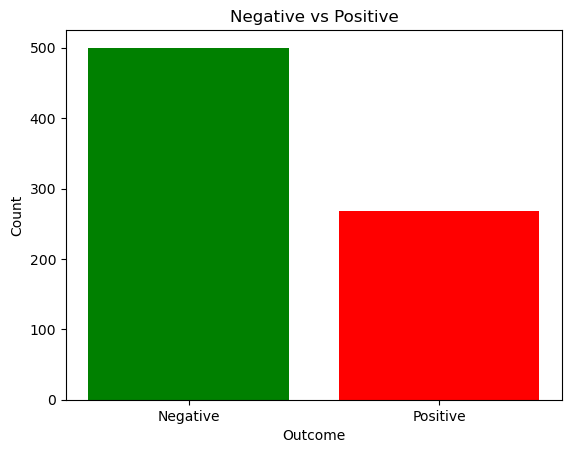

In [5]:
outcome = ['Negative', 'Positive']
count = data['Outcome'].value_counts()
count_list = count.tolist()

bar_colors =  ['green', 'red'] 
plt.bar(outcome, count_list, color=bar_colors)
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Negative vs Positive')

plt.show()

In [6]:
count

Outcome
0    500
1    268
Name: count, dtype: int64

In [7]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [8]:
corr = X.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
Pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


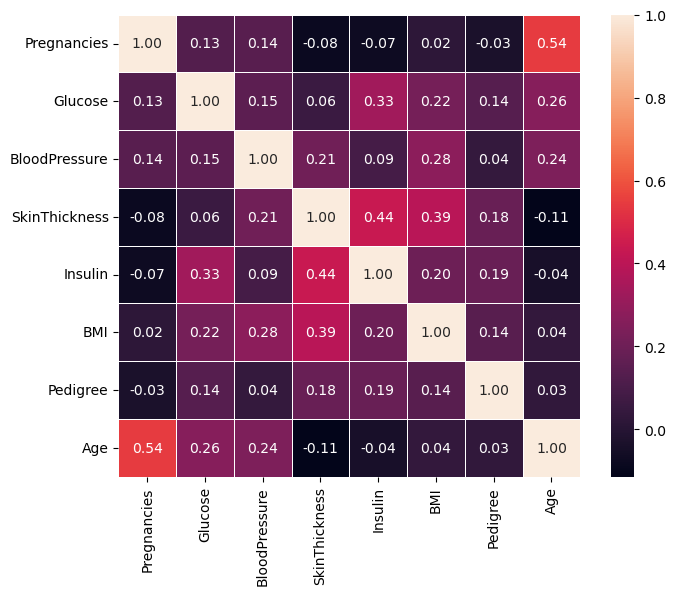

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", square=True, linewidth=.5)
plt.show()

In [10]:
iterations = 30
best_accuracy = 0
best_model = None
best_train_set = None
best_test_set = None
best_K = None
recall_knn = 0
precision_knn = 0
f1_knn = 0

In [16]:
start_time = time.time()

for i in range(iterations):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    sc = StandardScaler().set_output(transform='pandas')
    X_train = sc.fit_transform(X_train) 
    X_test = sc.transform(X_test)
    
    for K in range(1,30,2):
        neighbor = KNeighborsClassifier(n_neighbors=K)
        neighbor.fit(X_train,y_train)
        y_pred = neighbor.predict(X_test)
        
        accuracy_knn = accuracy_score(y_test,y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        print(f'Iteration {i+1}, K={K}, accuracy: {accuracy_knn:.4f}')

        if accuracy_knn>best_accuracy:
            best_accuracy = accuracy_knn
            
            recall_knn = recall
            precision_knn = precision
            f1_knn = f1
            
            best_model = neighbor
            best_train_model = (X_train,y_train)
            best_test_model = (X_test,y_test)
            best_K = K

end_time = time.time()
execution_time = end_time - start_time


Iteration 1, K=1, accuracy: 0.6234
Iteration 1, K=3, accuracy: 0.7078
Iteration 1, K=5, accuracy: 0.6948
Iteration 1, K=7, accuracy: 0.6818
Iteration 1, K=9, accuracy: 0.6818
Iteration 1, K=11, accuracy: 0.7078
Iteration 1, K=13, accuracy: 0.7078
Iteration 1, K=15, accuracy: 0.7208
Iteration 1, K=17, accuracy: 0.7532
Iteration 1, K=19, accuracy: 0.7597
Iteration 1, K=21, accuracy: 0.7662
Iteration 1, K=23, accuracy: 0.7403
Iteration 1, K=25, accuracy: 0.7403
Iteration 1, K=27, accuracy: 0.7468
Iteration 1, K=29, accuracy: 0.7403
Iteration 2, K=1, accuracy: 0.6234
Iteration 2, K=3, accuracy: 0.7078
Iteration 2, K=5, accuracy: 0.6948
Iteration 2, K=7, accuracy: 0.6818
Iteration 2, K=9, accuracy: 0.6818
Iteration 2, K=11, accuracy: 0.7078
Iteration 2, K=13, accuracy: 0.7078
Iteration 2, K=15, accuracy: 0.7208
Iteration 2, K=17, accuracy: 0.7532
Iteration 2, K=19, accuracy: 0.7597
Iteration 2, K=21, accuracy: 0.7662
Iteration 2, K=23, accuracy: 0.7403
Iteration 2, K=25, accuracy: 0.7403
It

In [17]:
# Results
print(f'Optimal K: {best_K}')
print(f'Accuracy: {best_accuracy:.4f}')
print(f'Recall: {recall_knn:.4f}')
print(f'Precision: {precision_knn:.4f}')
print(f'F1-score: {f1_knn:.4f}')

print(f'\nEjecution time: {execution_time:.2f} seconds')

Optimal K: 21
Accuracy: 0.7662
Recall: 0.5273
Precision: 0.7436
F1-score: 0.6170

Ejecution time: 12.13 seconds


**Matriz de confusión**
La matriz de confusión $C$ guarda en la coordenada $C_{ij}$ la cantidad de observaciones en el grupo $i$ que fueron clasificadas en el grupo $j$.

Si la variable es binaria:
- $C_{00}$ son los casos negativos clasificados correctamente.
- $C_{01}$ son los casos negativos  clasificados como positivos (falsos positivos).
- $C_{10}$ son los casos positivos  clasificados como negativos (falsos negativos).
- $C_{11}$ son los casos positivos clasificados correctamente.

**Confusion Matrix**  
The confusion matrix $C$ stores in the coordinate $C_{ij}$ the number of observations in group $i$ that were classified into group $j$.

If the variable is binary:
- $C_{00}$ represents the correctly classified negative cases.
- $C_{01}$ represents the negative cases classified as positive (false positives).
- $C_{10}$ represents the positive cases classified as negative (false negatives).
- $C_{11}$ represents the correctly classified positive cases.


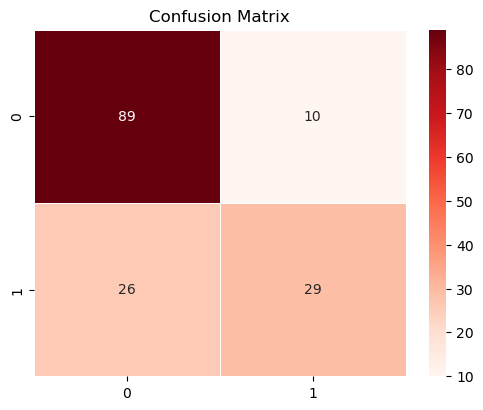

In [44]:
X_train, y_train = best_train_model
X_test, y_test = best_test_model
y_pred_best = best_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(6, 4.5))
sns.heatmap(conf_matrix ,fmt="d", annot = True , cmap = "Reds" , linewidths = 0.7)
plt.title('Confusion Matrix')
plt.show()

# Decision tree


In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [19]:
best_accuracy = 0
best_tree = None

iterations = 50
max_depth_range = range(1,21)

start_time = time.time()

for max_depth in max_depth_range:
    accuracies = []
    
    for i in range(iterations):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        sc = StandardScaler().set_output(transform='pandas')
        X_train = sc.fit_transform(X_train) 
        X_test = sc.transform(X_test)
        tree = DecisionTreeClassifier(max_depth=max_depth)
        tree.fit(X_train,y_train)
        y_pred = tree.predict(X_test)
        
        accuracy = accuracy_score(y_test,y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        accuracies.append(accuracy)

    avg_accuracy = np.mean(accuracies)

    # Update best values if the average accuracy is better than the best found
    if avg_accuracy > best_accuracy:
        best_accuracy = avg_accuracy
        
        # Recalculate metrics for the best model using the last iteration predictions
        y_pred_best = tree.predict(X_test)  # Get predictions for the last trained model
        
        recall_dt = recall_score(y_test, y_pred_best)
        precision_dt = precision_score(y_test, y_pred_best)
        f1_dt = f1_score(y_test, y_pred_best)
        best_tree = max_depth

end_time = time.time()

In [20]:
print(f'Best Max Depth: {best_tree}')
print(f'Best Average Accuracy: {best_accuracy:.4f}')
print(f'Recall: {recall_dt:.4f}')
print(f'Precision: {precision_dt:.4f}')
print(f'F1-score: {f1_dt:.4f}')
print(f'Execution Time: {execution_time:.2f} seconds')

Best Max Depth: 5
Best Average Accuracy: 0.7939
Recall: 0.6364
Precision: 0.7447
F1-score: 0.6863
Execution Time: 12.13 seconds


              precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.64      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154



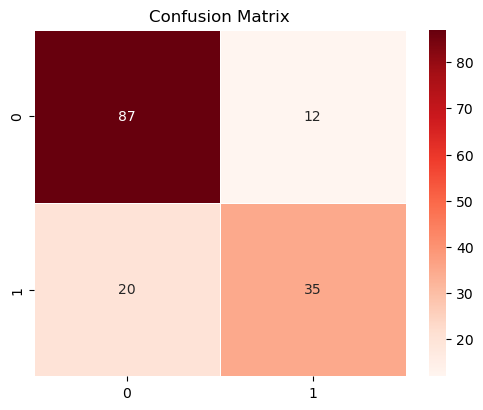

In [21]:
best_classifier = DecisionTreeClassifier(max_depth=best_tree)
best_classifier.fit(X_train, y_train)
y_pred = best_classifier.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6, 4.5))
sns.heatmap(conf_matrix ,fmt="d", annot = True , cmap = "Reds" , linewidths = 0.7)
plt.title('Confusion Matrix')
plt.show()

# Random forests


In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
best_accuracy_rf = 0
best_rf = None
best_recall_rf = 0
best_precision_rf = 0
best_f1_rf = 0

iterations = 30
n_estimators_range = [50, 100, 200]
max_depth_range = range(1, 21)

start_time_rf = time.time()

for n_estimators in n_estimators_range:
    for max_depth in max_depth_range:
        accuracies_rf = []
        for j in range(iterations):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            sc = StandardScaler().set_output(transform='pandas')
            X_train = sc.fit_transform(X_train) 
            X_test = sc.transform(X_test)

            # Entrenamiento del modelo Random Forest
            rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
            rf.fit(X_train, y_train)
            y_pred_rf = rf.predict(X_test)

            # Calcular métricas
            accuracy_rf = accuracy_score(y_test, y_pred_rf)
            recall_rf = recall_score(y_test, y_pred_rf)
            precision_rf = precision_score(y_test, y_pred_rf)
            f1_rf = f1_score(y_test, y_pred_rf)
            accuracies_rf.append(accuracy_rf)

        # Calcular la precisión promedio de las iteraciones
        avg_accuracy_rf = np.mean(accuracies_rf)

        # Guardar el mejor modelo encontrado y sus métricas
        if avg_accuracy_rf > best_accuracy_rf:
            best_accuracy_rf = avg_accuracy_rf
            best_rf = (n_estimators, max_depth)
            best_recall_rf = recall_rf  # Guardar el recall del mejor modelo
            best_precision_rf = precision_rf  # Guardar la precisión del mejor modelo
            best_f1_rf = f1_rf  # Guardar el f1-score del mejor modelo

end_time_rf = time.time()

In [29]:
print(f'Mejor Random Forest: Estimadores = {best_rf[0]}, Profundidad = {best_rf[1]}, '
      f'Avg accuracy = {best_accuracy_rf:.4f}, Recall = {best_recall_rf:.4f}, '
      f'Precision = {best_precision_rf:.4f}, F1-score = {best_f1_rf:.4f}')
print(f'Tiempo de ejecución: {end_time_rf - start_time_rf:.2f} segundos')

Mejor Random Forest: Estimadores = 200, Profundidad = 3, Avg accuracy = 0.7853, Recall = 0.5818, Precision = 0.7442, F1-score = 0.6531
Tiempo de ejecución: 500.38 segundos


              precision    recall  f1-score   support

           0       0.79      0.89      0.83        99
           1       0.74      0.56      0.64        55

    accuracy                           0.77       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.77      0.77      0.76       154



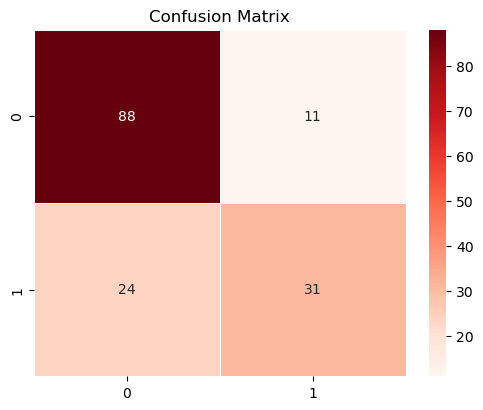

In [27]:
best_classifier_rf = RandomForestClassifier(n_estimators=best_rf[0], max_depth=best_rf[1])
best_classifier_rf.fit(X_train, y_train)
y_pred_rf = best_classifier_rf.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred_rf)
print(classification_report(y_test, y_pred_rf))

plt.figure(figsize=(6, 4.5))
sns.heatmap(conf_matrix ,fmt="d", annot = True , cmap = "Reds" , linewidths = 0.7)
plt.title('Confusion Matrix')
plt.show()

# Comparison of metrics for different models

## Metrics

Accuracy: Accuracy represents the overall correctness rate of the model's predictions. It indicates the proportion of correctly classified cases out of the total data.

Recall: Recall measures the proportion of actual diabetic cases that are correctly identified by the model. It shows how well the model captures the true positive cases of diabetes.

Precision: Precision calculates the proportion of predicted diabetic cases that are actually true positive cases. It indicates the accuracy of the model's positive predictions for diabetes.

F1 Score: F1 score is the harmonic mean of recall and precision. It provides a balanced measure by considering both recall and precision equally, evaluating the overall performance of the model.

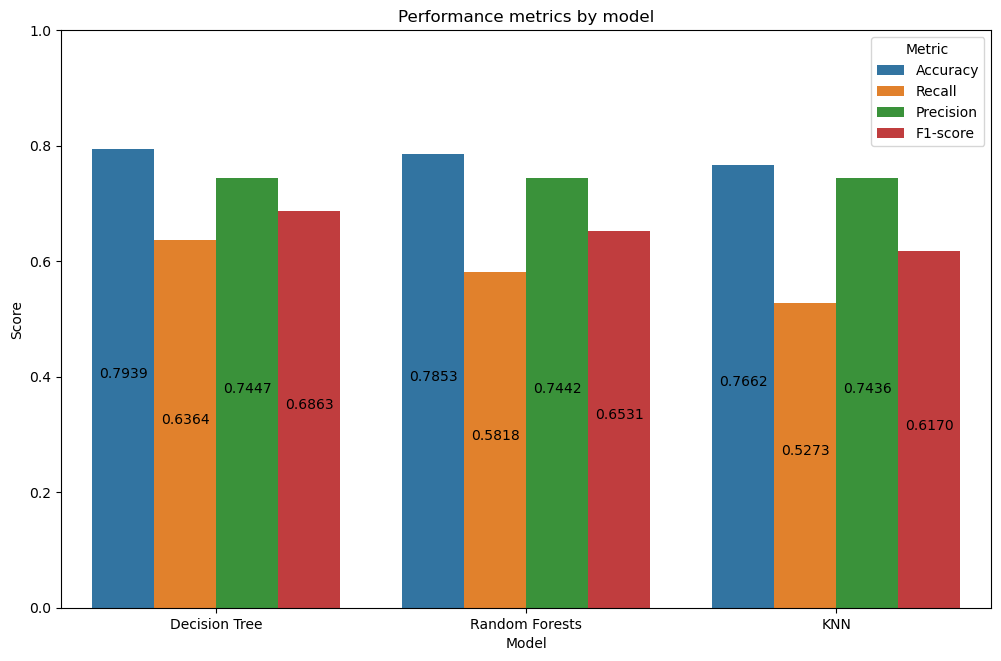

In [39]:
metrics = {
    'Model': ['KNN', 'Decision Tree', 'Random Forests'],
    'Accuracy': [0.7662, 0.7939, 0.7853],
    'Recall': [0.5273, 0.6364, 0.5818],
    'Precision': [0.7436, 0.7447, 0.7442],
    'F1-score': [0.6170, 0.6863, 0.6531],
}

results_df = pd.DataFrame(metrics)
results_df = results_df.sort_values(by='Accuracy', ascending=False)

#Transform dataframe to Long-Form
results_melted = results_df.melt(id_vars='Model', var_name='Metric', value_name='Value')

plt.figure(figsize=(12,7.5))
ax = sns.barplot(data=results_melted, x='Model', y='Value', hue='Metric')

for container in ax.containers:
    ax.bar_label(container, fmt='%.4f', label_type='center', padding=3)

plt.title('Performance metrics by model')
plt.ylabel('Score')
plt.ylim(0,1)
plt.legend(loc='best', title='Metric')

plt.show()

# Neural Network
